# Desafio #QuarentenaDados

Bem-vinda e bem-vindo ao desafio #QuarentenaDados valendo um **Nintendo Switch**!

Esse notebook traz informações dos dados e como você deve configurar seu arquivo final para submissão.

**Caso queira usar esse notebook como exemplo para desenvolver seu projeto, clique em file e escolha a opção Save a copy in Drive**


Vamos trabalhar com uma amostra aleatória da base de dados MICRODADOS ENEM 2018, essa amostra é **diferente da apresentada em aula**. Junto com a divulgação do resultado final estaremos disponibilizando o código que gerou os dados para que você possa analisar e reproduzir os datasets. 

Seu objetivo é prever da melhor forma possível a nota das provas de **linguagens e códigos** (NU_NOTA_LC), dado todas as outras notas. O modelo que tiver o menor **erro quadrático médio (MSE)** vence o desafio.

Para o desafio você tem três bases à disposição, duas para desenvolver seu modelo e uma para submissão da predição. As bases são as seguintes:

- **dados_treino**: São 1500000 linhas contendo a nota das 4 provas + nota de redação.

- **dados_teste**: São 20000 linhas contendo com notas das 4 provas + nota de redação.

- **dados_desafioqt**: São 10000 linhas com nota de 3 provas + nota de redação. A nota da prova de **Linguagem e Codigos** (NU_NOTA_LC) não está disponível nessa base.


As base **dados_treino e dados_teste**, contém as seguintes colunas; **NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO, NU_NOTA_LC** (Você pode consultar a aula 5, onde o Guilherme explica o significado das siglas). A coluna que você deve realizar a **previsão** é **NU_NOTA_LC**. Você pode manipular os dados da forma que quiser, o importante é que no final submeta o arquivo com as informações corretas (detalhes da submissão serão discutidos no final deste notebook).

A base **dados_desafioqt**, contém as seguintes colunas; **ID, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_MT, NU_NOTA_REDACAO**. Repare que os dados **NU_NOTA_LC** não estão presentes, essa é justamente a informação que você precisa prever. Nós temos os valores reais das notas, no final do prazo de submissão um script irá avaliar sua previsão e dará uma nota para o seu modelo. Nessa base também temos o **ID**, essa informação é importante para o envio da sua previsão, garanta que a nota prevista corresponda ao respectivo **ID**.

Se você está habituado com o desenvolvimento de modelos de ML, repare que essa divisão de dados é exatamente a mesma que Treino, Teste e Validação. 

Abaixo preparamos um código exemplo para você seguir, sinta-se à vontade para experimentar diversos outros métodos, mas **GARANTA QUE O ARQUIVO DE SUBMISSÃO ESTEJA CONFIGURADO CORRETAMENTE**.

Na primeira parte, estamos lendo a base de dados direto de arquivos no github.






In [0]:
import pandas as pd

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

Agora com as bases de dados lidas, vamos separar as informações de cada dataset. X_treino e Y_treino são as **features**, X_teste e Y_teste são as **labels** a serem previstas.

Duas observações nesta parte:

- 1° Como já disponibilizamos os dados de treino e teste separados, você não precisa fazer *train_test_split* feito em aula (porém fique à vontade para trabalhar da forma que achar melhor).

- 2° Transformamos X_treino, Y_treino, X_teste, Y_teste em arrays numpy. Se você quiser usar uma biblioteca que não aceite dataframe como entrada de dados, já deixamos pronto para você.

In [0]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()
X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()


A seguir criamos um modelo **Dummy** como exemplo e realizamos a avaliação do modelo com o **mean_squared_error**. 

Você pode usar qualquer algoritmo ou biblioteca para criar seus modelos, mas garanta que fará a avaliação com o mean_squared_error, pois usaremos essa métrica para avaliar sua predição final.

In [176]:
#Exemplo de classificação com Dummy
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

modelo_dummy = DummyRegressor()
modelo_dummy.fit(X_treino, Y_treino)
dummy_predicoes = modelo_dummy.predict(X_teste)

avaliacao_dummy = mean_squared_error(Y_teste, dummy_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_dummy}")

Minha avaliação nos dados de teste foi de 5219.286870186777


Depois que você criou testou e validou seu modelo, chegou a hora de preparar seu arquivo para a submissão do resultado.

No código abaixo, estamos realizando a predição das notas de **linguagem e códigos** do dataset **dados_desafioqt**. Feita a previsão, criamos um dataframe novo para a submissão, primeiro crimos a coluna **ID** e adicionamos a coluna **NU_NOTA_LC** com suas respectivas previsões (repare que nosso modelo não alterou as ordens dos ID's, mas se você utilizar algum modelo que embaralhe essa ordem certifique de colocar a previsão correta para o ID correto).

Após isso, salvamos o dataframe com ´.to_csv()´ (**importante, passe o parâmetro index=False para `.to_csv()`, caso contrário nosso script não computará sua nota**) no arquivo **PREDICAO_DESAFIOQT.csv (você precisa submeter o arquivo com esse nome, caso contrário nosso script de avaliação não computará sua nota**)  e utilizamos o `files.download` para baixar o arquivo em sua máquina local.

Feito tudo isso você está quase pronto para finalizar e submeter seu resultado. Você já baixou os dados, treinou e validou seu modelo, salvou sua previsão **no padrão ideal para submissão** e já está com o modelo baixado em sua máquina. Entretanto, ainda falta um detalhe: no momento de preencher o **forms** você precisa enviar seu código. Caso esteja usando os notebooks do colab siga as seguintes instruções para o download:

- Clique em **File** na parte superior esquerda.
- Depois selecione a opção **Download .ipynb** (também aceitaremos o .py caso você prefira desenvolver seu projeto em um arquivo python).


Pronto agora é só submeter seu resultado e torcer para levar um **Nintendo Switch** para casa.

Boa sorte!

In [0]:
#atribuir ao MODELO o nome do seu melhor modelo
from google.colab import files

MODELO = modelo_dummy
X_desafioqt = dados_desafioqt[coluna_features].to_numpy()
predicao_desafioqt = MODELO.predict(X_desafioqt)


desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df[coluna_label] = predicao_desafioqt

#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
#desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
#files.download('PREDICAO_DESAFIOQT.csv')

# Resposta


## Análise

In [0]:
import numpy as np
np.random.seed(28630)

In [179]:
X_treino.shape

(150000, 4)

In [180]:
X_treino_df = pd.DataFrame(X_treino)
X_treino_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       150000 non-null  float64
 1   1       150000 non-null  float64
 2   2       150000 non-null  float64
 3   3       150000 non-null  float64
dtypes: float64(4)
memory usage: 4.6 MB


In [181]:
X_treino_df.describe()

,0,1,2,3
count,150000.000000,150000.000000,150000.000000,150000.000000
mean,493.890438,570.752255,535.615000,516.269867
std,74.154695,79.399706,103.033382,184.355231
min,0.000000,0.000000,0.000000,0.000000
25%,435.800000,513.300000,455.500000,360.000000
50%,483.600000,584.900000,516.700000,520.000000
75%,542.500000,629.600000,600.900000,640.000000
max,869.600000,825.800000,996.100000,1000.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


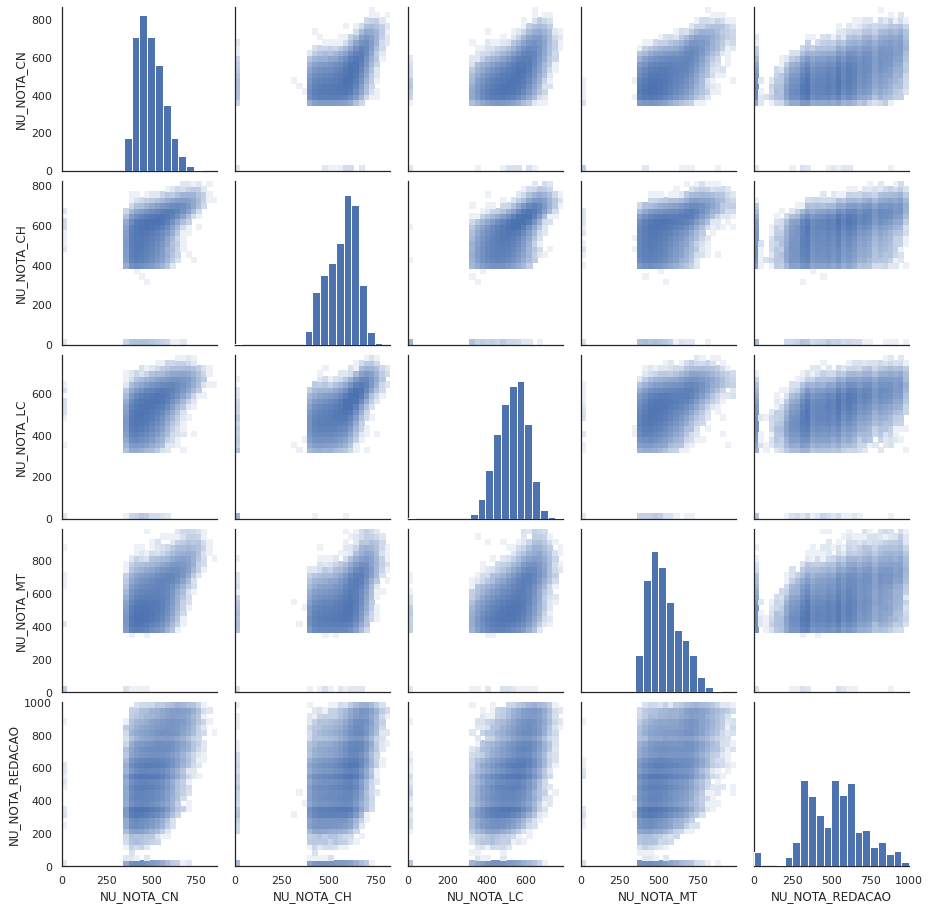

In [182]:
# Fonte: https://stackoverflow.com/questions/43924280/pair-plot-with-heat-maps-possibly-logarithmic/43924911
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

sns.set()
sns.set_style("white")

g = sns.PairGrid(dados_treino)
g.map_diag(plt.hist, bins=20)

#cmap_azul_vermelho = sns.color_palette("RdBu_r", n_colors=6)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)
    

g.map_offdiag(pairgrid_heatmap, bins=30, norm=LogNorm())
plt.show()

Analisando o gráfico acima, na linha do meio, em que vemos a relação de `NU_NOTA_LC` com as demais colunas, vemos uma área mais concentrada, em que os valores batem mas ainda existe uma região muito densa em volta que faz bastante diferença.

Vendo dessa forma, não acredito que seja um bom caminho tentar usar uma regressão linear ou qualquer coisa que tente aproximar por uma reta, pois estou enxergando **superfícies** na relação entre as notas.

Assim, uma estratégia melhor seria usar algo que utilize essa superfície, isto é, que aproveite essas nuances para estimar a nota de LC.

## Preparação

In [0]:
from sklearn.model_selection import train_test_split
#?train_test_split

np.random.seed(28630)

# criar um subconjunto de samples para validacao (validation set ou devset), com 2% dos elementos de treino (vai treinar com 98%)
X_treino2, X_validation, Y_treino2, Y_validation = train_test_split(X_treino, Y_treino, test_size=0.02)

In [184]:
X_treino2_df = pd.DataFrame(X_treino2)
X_treino2_df.columns = coluna_features
X_treino2_df[coluna_label] =  Y_treino2
X_treino2_df.to_csv('desafio_quarentenadados_train_set.csv')
X_treino2_df

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_LC
0,485.4,511.0,491.9,720.0,449.9
1,564.5,661.0,649.4,600.0,642.4
2,489.6,572.6,458.6,500.0,541.7
3,395.3,472.7,416.7,0.0,455.3
4,534.8,513.4,538.2,340.0,540.1
...,...,...,...,...,...
146995,589.3,539.3,619.8,580.0,597.2
146996,427.5,633.0,495.8,580.0,586.3
146997,387.7,574.7,553.0,500.0,502.6
146998,533.8,584.6,522.3,460.0,504.2


In [185]:
X_validation_df = pd.DataFrame(X_validation)
X_validation_df.columns = coluna_features
X_validation_df[coluna_label] =  Y_validation
X_validation_df.to_csv('desafio_quarentenadados_validation_set.csv')
X_validation_df

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_LC
0,422.1,565.3,585.1,600.0,537.4
1,519.0,599.4,550.4,720.0,515.4
2,466.3,595.6,409.5,620.0,609.2
3,412.5,450.9,516.3,360.0,460.2
4,480.3,470.7,534.5,520.0,534.6
...,...,...,...,...,...
2995,555.0,570.0,540.7,560.0,533.5
2996,522.3,588.6,595.9,820.0,604.5
2997,396.0,610.0,402.3,320.0,559.4
2998,411.6,582.8,577.2,600.0,496.1


In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_treino2s = scaler.fit_transform(X_treino2)
Y_treino2s = scaler.fit_transform(Y_treino2.reshape(-1,1)).reshape(-1,1)

print(X_treino2s.shape)
print(Y_treino2s.shape)

(147000, 4)
(147000, 1)


## Modelo 1

In [0]:
from sklearn.svm import SVR

modelo1 = SVR(C=500, verbose=True, max_iter=3000)

In [188]:
from sklearn.metrics import mean_squared_error

hist = modelo1.fit(X_treino2s, Y_treino2s)

[LibSVM]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [189]:
Y_pred = modelo1.predict(X_validation)
print(mean_squared_error(Y_validation, Y_pred))

285248.72802207223


In [190]:
modelo1.score(X_validation, Y_validation)

-53.74918498480704

In [191]:
Y_pred = modelo1.predict(X_teste)
print(mean_squared_error(Y_teste, Y_pred))

283334.1735507353


## Modelo 2

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from tensorflow.keras import layers

modelo2 = tf.keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(4,)),
    layers.Dense(1, activation=None),
],
name = "modelo2")

modelo2.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                loss='mse',        # mean squared error
                metrics=['mae'])   # mean absolute error

In [194]:
modelo2.summary()

Model: "modelo2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [0]:
import os.path

def treinar_modelo(modelo, epochs=30, use_weights=True):
  if use_weights and os.path.isfile(f"{modelo.name}.h5"):
    modelo.load_weights(f"{modelo.name}.h5")
    print(f"modelo carregado do arquivo {modelo.name}.h5")
  else:
    tf.compat.v1.reset_default_graph()
    tf.random.set_seed(28630)
    hist = modelo.fit(X_treino2, Y_treino2,
                      epochs=epochs,
                      validation_data=(X_validation, Y_validation))
    modelo.save_weights(f"{modelo.name}.h5")
    return hist

In [196]:
hist = treinar_modelo(modelo2, use_weights=False)

Epoch 1/30
4594/4594 [==============================] - 5s 1ms/step - loss: 3189.8323 - mae: 40.0828 - val_loss: 2504.8081 - val_mae: 38.4656
Epoch 2/30
4594/4594 [==============================] - 5s 1ms/step - loss: 2395.0613 - mae: 38.0611 - val_loss: 2465.0320 - val_mae: 38.0720
Epoch 3/30
4594/4594 [==============================] - 5s 1ms/step - loss: 2355.0320 - mae: 37.7654 - val_loss: 2601.0903 - val_mae: 40.0546
Epoch 4/30
4594/4594 [==============================] - 5s 1ms/step - loss: 2339.7488 - mae: 37.6590 - val_loss: 2681.5283 - val_mae: 40.8636
Epoch 5/30
4594/4594 [==============================] - 5s 1ms/step - loss: 2313.3157 - mae: 37.4371 - val_loss: 2364.2068 - val_mae: 37.4281
Epoch 6/30
4594/4594 [==============================] - 5s 1ms/step - loss: 2290.1462 - mae: 37.2151 - val_loss: 2334.1753 - val_mae: 37.2064
Epoch 7/30
4594/4594 [==============================] - 5s 1ms/step - loss: 2278.2891 - mae: 37.0998 - val_loss: 2448.6978 - val_mae: 38.6084
Epoch 

In [0]:
import matplotlib.pyplot as plt

def plot_hist(hist):
  if (hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
  else:
    print("hist esta vazio.")

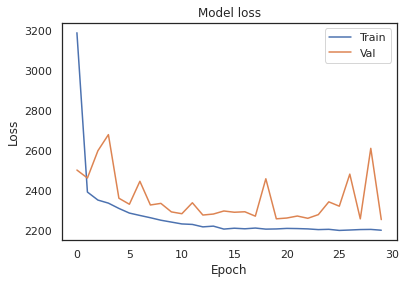

In [198]:
plot_hist(hist)    

In [199]:
modelo2.evaluate(X_teste, Y_teste)

625/625 [==============================] - 1s 1ms/step - loss: 2179.8528 - mae: 36.1366


[2179.852783203125, 36.136634826660156]

In [0]:
Y_pred_modelo2 = modelo2.predict(X_teste)

In [201]:
print(Y_pred_modelo2[:10].reshape(-1))
print(Y_teste[:10])

[537.6097  452.6725  654.2686  513.09485 552.4564  442.00372 461.24704
 489.3303  620.03436 497.1658 ]
[550.  406.3 652.3 469.1 580.5 498.1 494.5 451.2 664.7 470. ]


In [0]:
import seaborn as sns

def plot_scatter_Y(Y_pred, title=""):
  sns.scatterplot(Y_teste, Y_teste - Y_pred, ti)

In [203]:
plt.figure(figsize=(9,9))
plot_scatter_Y(Y_pred_modelo2.reshape(-1))

NameError: ignored

<Figure size 648x648 with 0 Axes>

## Modelo 3

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

modelo3 = tf.keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(4,)),
    layers.Dense(1, activation=None),
],
name="modelo3")

modelo3.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                loss='mse',        # mean squared error
                metrics=['mae'])   # mean absolute error

In [0]:
modelo3.summary()

In [0]:
hist = treinar_modelo(modelo3, epochs=20, use_weights=False)

In [0]:
plot_hist(hist)

In [0]:
modelo3.evaluate(X_teste, Y_teste)

In [0]:
Y_pred_modelo3 = modelo3.predict(X_teste)

In [0]:
notas_LC = pd.DataFrame(data=[Y_teste[:10], Y_pred_modelo3[:10].reshape(-1)])
notas_LC

In [0]:
plt.figure(figsize=(9,9))
plot_scatter_Y(Y_pred_modelo2.reshape(-1))
plot_scatter_Y(Y_pred_modelo3.reshape(-1))
plt.show()

## Modelo 4

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

modelo4 = tf.keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(4,)),
    layers.Dense(3, activation='relu'),
    layers.Dense(1, activation=None),
],
name="modelo4")

modelo4.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                loss='mse',        # mean squared error
                metrics=['mae'])   # mean absolute error

In [0]:
modelo4.summary()

In [0]:
hist = treinar_modelo(modelo4, epochs=20, use_weights=False)

In [0]:
plot_hist(hist)

In [0]:
modelo4.evaluate(X_teste, Y_teste)

In [0]:
Y_pred_modelo4 = modelo4.predict(X_teste)

In [0]:
notas_LC = pd.DataFrame(data=[Y_teste[:10], Y_pred_modelo4[:10].reshape(-1)])
notas_LC

In [0]:
plt.figure(figsize=(9,9))
plot_scatter_Y(Y_pred_modelo2.reshape(-1))
plot_scatter_Y(Y_pred_modelo3.reshape(-1))
plot_scatter_Y(Y_pred_modelo4.reshape(-1))
plt.show()

## Modelo 5

In [0]:
from sklearn.svm import LinearSVR

modelo5 = LinearSVR(C = 10, max_iter=4000, verbose=True)

In [0]:
modelo5.fit(X_treino2, Y_treino2)

In [0]:
Y_pred_modelo5 = modelo5.predict(X_validation)
print(mean_squared_error(Y_validation, Y_pred_modelo5))

In [0]:
modelo5.score(X_validation, Y_validation)

In [0]:
Y_pred_modelo5 = modelo5.predict(X_teste)
print(mean_squared_error(Y_teste, Y_pred_modelo5))

In [0]:
plt.figure(figsize=(9,9))
plot_scatter_Y(Y_pred_modelo2.reshape(-1))
plot_scatter_Y(Y_pred_modelo3.reshape(-1))
plot_scatter_Y(Y_pred_modelo4.reshape(-1))
plot_scatter_Y(Y_pred_modelo5.reshape(-1))
plt.show()

## Avaliação

In [0]:
# os melhores: modelo 3 vs modelo 5
plt.figure(figsize=(9,9))
plot_scatter_Y(Y_pred_modelo5.reshape(-1)) # azul
plot_scatter_Y(Y_pred_modelo3.reshape(-1)) # laranja << MELHOR
plt.show()

## Teste: sem nota de redação

In [0]:
X_treino2_sem_redacao = X_treino2[:,:3]
X_validation_sem_redacao = X_validation[:,:3]
X_teste_sem_redacao = X_teste[:,:3]
X_treino2_sem_redacao

In [0]:
modelo3_1 = tf.keras.Sequential([
    layers.Dense(6, activation='relu', input_shape=(3,)),
    layers.Dense(1, activation=None),
],
name="modelo3_1")

modelo3_1.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                loss='mse',        # mean squared error
                metrics=['mae'])   # mean absolute error

modelo3_1.summary()                

In [0]:
tf.compat.v1.reset_default_graph()
tf.random.set_seed(28630)

hist = modelo3_1.fit(X_treino2_sem_redacao, Y_treino2,
                    epochs=30,
                    validation_data=(X_validation_sem_redacao, Y_validation))

In [0]:
modelo3_1.save_weights("modelo3_1.h5")

In [0]:
plot_hist(hist)

In [0]:
modelo3_1.evaluate(X_teste_sem_redacao, Y_teste)

In [0]:
Y_pred_modelo3_1 = modelo3_1.predict(X_teste_sem_redacao)

In [0]:
notas_LC = pd.DataFrame(data=[Y_teste[:10], Y_pred_modelo3_1[:10].reshape(-1)])
notas_LC

In [0]:
plt.figure(figsize=(9,9))
plot_scatter_Y(Y_pred_modelo3.reshape(-1))
plot_scatter_Y(Y_pred_modelo3_1.reshape(-1))
plt.show()

## Teste: sem nota de matematica

In [0]:
X_treino2_sem_MT = np.delete(X_treino2, 2, axis=1)
X_validation_sem_MT = np.delete(X_validation, 2, axis=1)
X_teste_sem_MT = np.delete(X_teste, 2, axis=1)
X_treino2_sem_MT

In [0]:
modelo3_2 = tf.keras.Sequential([
    layers.Dense(3, activation='relu', input_shape=(3,)),
    layers.Dense(1, activation=None),
],
name="modelo3_2")

modelo3_2.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                loss='mse',        # mean squared error
                metrics=['mae'])   # mean absolute error

modelo3_2.summary()                

In [0]:
tf.compat.v1.reset_default_graph()
tf.random.set_seed(28630)

hist = modelo3_2.fit(X_treino2_sem_MT, Y_treino2,
                    epochs=30,
                    validation_data=(X_validation_sem_MT, Y_validation))

In [0]:
modelo3_2.save_weights("modelo3_2.h5")

In [0]:
plot_hist(hist)

In [0]:
modelo3_2.evaluate(X_teste_sem_MT, Y_teste)

In [0]:
Y_pred_modelo3_2 = modelo3_2.predict(X_teste_sem_MT)

In [0]:
notas_LC = pd.DataFrame(data=[Y_teste[:10], Y_pred_modelo3_2[:10].reshape(-1)])
notas_LC

In [0]:
plt.figure(figsize=(9,9))
plot_scatter_Y(Y_pred_modelo3.reshape(-1))
plot_scatter_Y(Y_pred_modelo3_2.reshape(-1))
plt.show()

## Modelo 3: Treinando mais um pouco

In [0]:
hist = treinar_modelo(modelo3, epochs=10, use_weights=False)

In [0]:
hist = treinar_modelo(modelo3, epochs=10, use_weights=False)

In [0]:
plot_hist(hist)

In [0]:
modelo3.evaluate(X_teste, Y_teste)

# Modelo Final para o Desafio #QuarentenaDados

In [204]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

modeloqt = tf.keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(4,)),
    layers.Dense(1, activation=None),
],
name="modeloqt")

modeloqt.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                 loss='mse',        # mean squared error
                 metrics=['mae'])   # mean absolute error

modeloqt.summary()                 

Model: "modeloqt"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


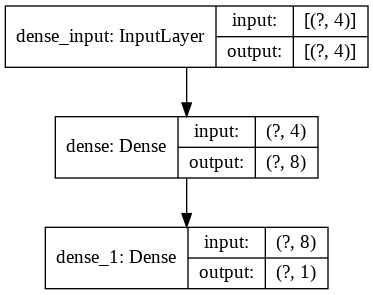

In [217]:
tf.keras.utils.plot_model(modeloqt, show_shapes=True)

In [207]:
hist_modeloqt = treinar_modelo(modeloqt, epochs=20)

Epoch 1/20
4594/4594 [==============================] - 5s 1ms/step - loss: 3282.8574 - mae: 40.2900 - val_loss: 2694.9932 - val_mae: 40.1358
Epoch 2/20
4594/4594 [==============================] - 5s 1ms/step - loss: 2421.7600 - mae: 38.3448 - val_loss: 2453.8596 - val_mae: 38.1108
Epoch 3/20
4594/4594 [==============================] - 5s 1ms/step - loss: 2360.1997 - mae: 37.7665 - val_loss: 2558.4932 - val_mae: 39.3168
Epoch 4/20
4594/4594 [==============================] - 5s 1ms/step - loss: 2353.5833 - mae: 37.7628 - val_loss: 2796.2815 - val_mae: 41.8213
Epoch 5/20
4594/4594 [==============================] - 5s 1ms/step - loss: 2310.4292 - mae: 37.3519 - val_loss: 2322.6028 - val_mae: 37.3324
Epoch 6/20
4594/4594 [==============================] - 5s 1ms/step - loss: 2280.3364 - mae: 37.0676 - val_loss: 2319.6135 - val_mae: 37.2997
Epoch 7/20
4594/4594 [==============================] - 5s 1ms/step - loss: 2268.6309 - mae: 36.9797 - val_loss: 2409.6985 - val_mae: 38.0868
Epoch 

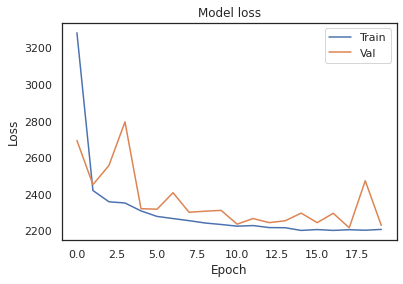

In [208]:
plot_hist(hist_modeloqt)

In [210]:
modeloqt.evaluate(X_teste, Y_teste)

625/625 [==============================] - 1s 1ms/step - loss: 2170.8337 - mae: 36.0092


[2170.833740234375, 36.009151458740234]

Modelo Final obteve MSE = 2170,8337 no conjunto de dados de teste.

In [214]:
#atribuir ao MODELO o nome do seu melhor modelo
from google.colab import files

MODELO = modeloqt

X_desafioqt = dados_desafioqt[coluna_features].to_numpy()
predicao_desafioqt = MODELO.predict(X_desafioqt)

desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df[coluna_label] = predicao_desafioqt
desafio_df

,ID,NU_NOTA_LC
0,0,516.981628
1,1,573.561951
2,2,522.363586
3,3,475.562286
4,4,529.116272
...,...,...
9995,9995,523.817993
9996,9996,445.003632
9997,9997,534.319214
9998,9998,573.517944


In [0]:
#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
files.download('PREDICAO_DESAFIOQT.csv')

# Referências

* https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
* https://www.tensorflow.org/guide/keras/overview
* https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4
* https://neptune.ai/blog/keras-metrics
* https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
* https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6